In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('bigdatamart_Train.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
df.shape

(8523, 12)

In [6]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

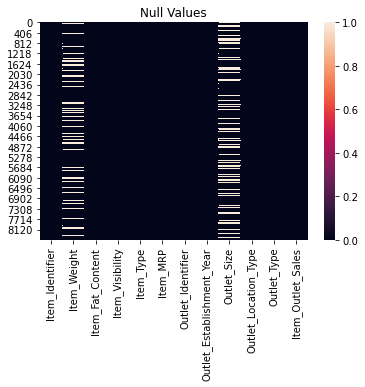

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.title('Null Values')
plt.show()

We can see certain null values in 2 columns.

In [9]:
df['Item_Weight']=df['Item_Weight'].fillna(np.mean(df['Item_Weight']))
df['Outlet_Size']=df['Outlet_Size'].fillna(' ')

In [10]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

There are no null values present anymore.

# Data Visualisation

8523


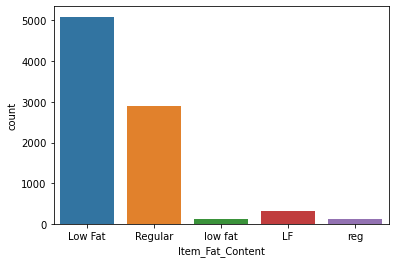

In [11]:
ax=sns.countplot(x='Item_Fat_Content',data=df)
print(df['Item_Fat_Content'].count())

8523


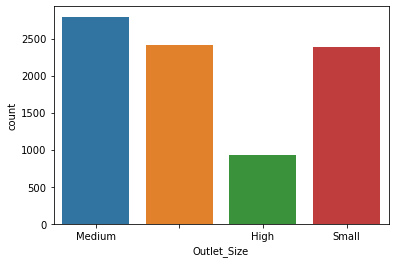

In [12]:
ax=sns.countplot(x='Outlet_Size',data=df)
print(df['Outlet_Size'].count())

8523


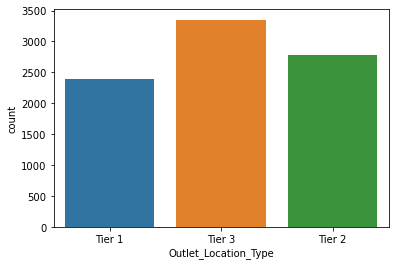

In [13]:
ax=sns.countplot(x='Outlet_Location_Type',data=df)
print(df['Outlet_Location_Type'].count())

8523


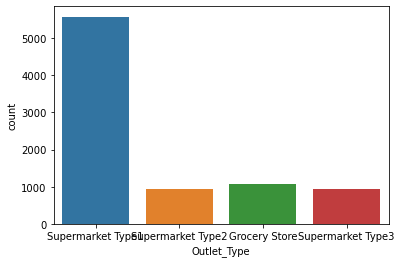

In [14]:
ax=sns.countplot(x='Outlet_Type',data=df)
print(df['Outlet_Type'].count())

8523


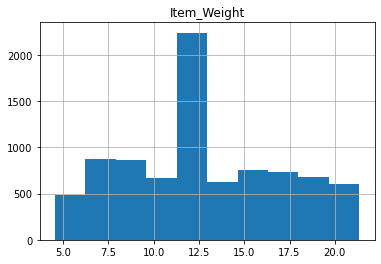

In [15]:
df['Item_Weight'].hist(grid=True)
plt.title('Item_Weight')
print(df['Item_Weight'].count())
plt.show()

8523


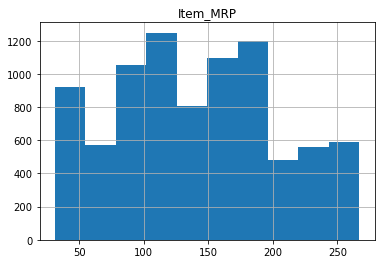

In [16]:
df['Item_MRP'].hist(grid=True)
plt.title('Item_MRP')
print(df['Item_MRP'].count())
plt.show()

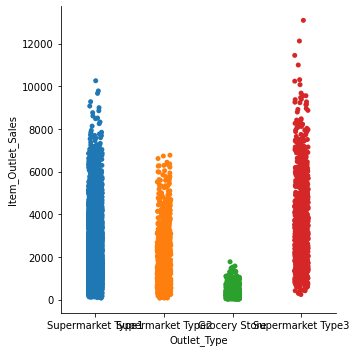

In [17]:
sns.catplot(x='Outlet_Type',y='Item_Outlet_Sales', data=df)

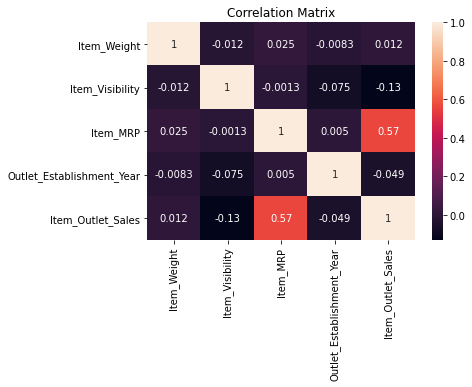

In [18]:
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

Our target "Item_Outlet_Sales" has highest correlation with 'Item_MRP'.  

In [19]:
corr_matrix=df.corr()
corr_matrix['Item_Outlet_Sales'].sort_values(ascending=False)

Item_Outlet_Sales            1.000000
Item_MRP                     0.567574
Item_Weight                  0.011550
Outlet_Establishment_Year   -0.049135
Item_Visibility             -0.128625
Name: Item_Outlet_Sales, dtype: float64

# Encoding the data

In [20]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [21]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.300,1.0,0.016047,4.0,249.8092,9.0,1999,2.0,0.0,1.0,3735.1380
1,8.0,5.920,2.0,0.019278,14.0,48.2692,3.0,2009,2.0,2.0,2.0,443.4228
2,662.0,17.500,1.0,0.016760,10.0,141.6180,9.0,1999,2.0,0.0,1.0,2097.2700
3,1121.0,19.200,2.0,0.000000,6.0,182.0950,0.0,1998,0.0,2.0,0.0,732.3800
4,1297.0,8.930,1.0,0.000000,9.0,53.8614,1.0,1987,1.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370.0,6.865,1.0,0.056783,13.0,214.5218,1.0,1987,1.0,2.0,1.0,2778.3834
8519,897.0,8.380,2.0,0.046982,0.0,108.1570,7.0,2002,0.0,1.0,1.0,549.2850
8520,1357.0,10.600,1.0,0.035186,8.0,85.1224,6.0,2004,3.0,1.0,1.0,1193.1136
8521,681.0,7.210,2.0,0.145221,13.0,103.1332,3.0,2009,2.0,2.0,2.0,1845.5976


In [22]:
df.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.994824
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.259537
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

Keeping +/-(0.5) as the range of skewness. Due to "Item_Visibility" bieng continues data we need to treat skewnes.


In [23]:
x=df.drop('Item_Outlet_Sales', axis =1)
y=df['Item_Outlet_Sales']

In [24]:
from sklearn.preprocessing import power_transform
df.new=power_transform(x)

df.new=pd.DataFrame(df.new,columns=x.columns)

In [25]:
df.new.skew()

Item_Identifier             -0.293700
Item_Weight                 -0.068024
Item_Fat_Content             0.032643
Item_Visibility              0.124279
Item_Type                   -0.164574
Item_MRP                    -0.115386
Outlet_Identifier           -0.213935
Outlet_Establishment_Year   -0.200959
Outlet_Size                 -0.278713
Outlet_Location_Type        -0.220632
Outlet_Type                  0.007863
dtype: float64

In [26]:
x=df.new

# Checking for outliers

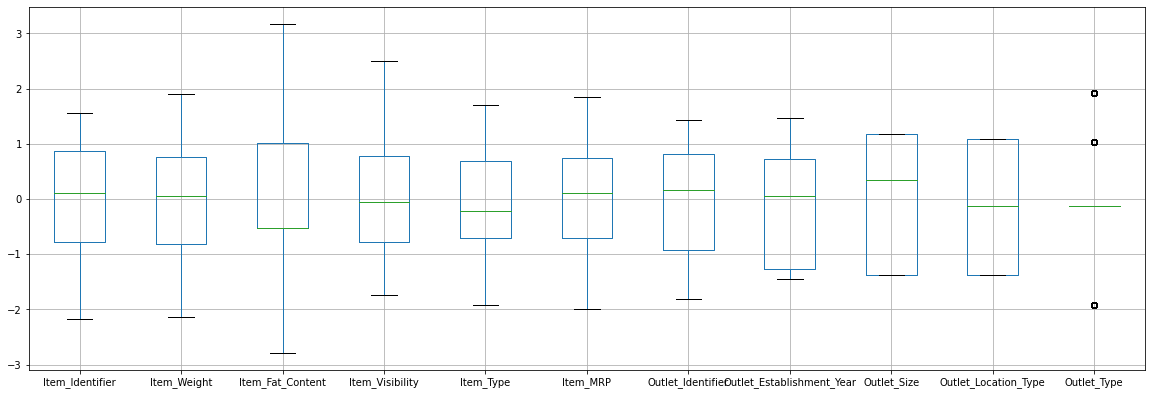

In [27]:
x.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

Very few outliers colud be seen. It could be termed as extreme values.

# Scaling the data using Min-Max Scaler

In [28]:
from sklearn.preprocessing import MinMaxScaler 
mms=MinMaxScaler() 
from sklearn.linear_model import LinearRegression 
lr=LinearRegression() 
from sklearn.metrics import r2_score 

In [29]:
for i in range(0,100):
    x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=i)
    lr.fit(x_train,y_train) 
    pred_train=lr.predict(x_train) 
    pred_test=lr.predict(x_test) 
    print (f"At randon state {i}, the training accuracy is:- {r2_score(y_train, pred_train)}") 
    print (f"At random state {i}, the testing accuracy is:{r2_score(y_test,pred_test)}") 
    print("\n")

At randon state 0, the training accuracy is:- 0.5272120850977334
At random state 0, the testing accuracy is:0.531648500532128


At randon state 1, the training accuracy is:- 0.5281401521108606
At random state 1, the testing accuracy is:0.527347406415309


At randon state 2, the training accuracy is:- 0.5317598022505615
At random state 2, the testing accuracy is:0.5134499986661545


At randon state 3, the training accuracy is:- 0.5198670868112503
At random state 3, the testing accuracy is:0.5600669137011272


At randon state 4, the training accuracy is:- 0.5313637945869261
At random state 4, the testing accuracy is:0.5127564346174944


At randon state 5, the training accuracy is:- 0.5311116462963777
At random state 5, the testing accuracy is:0.5159962068500665


At randon state 6, the training accuracy is:- 0.5300133320923083
At random state 6, the testing accuracy is:0.5197480931017953


At randon state 7, the training accuracy is:- 0.5336440509518127
At random state 7, the testing acc

At randon state 72, the training accuracy is:- 0.5231597689232085
At random state 72, the testing accuracy is:0.5475641603794549


At randon state 73, the training accuracy is:- 0.5301973334776753
At random state 73, the testing accuracy is:0.5186510687991803


At randon state 74, the training accuracy is:- 0.533722615243142
At random state 74, the testing accuracy is:0.5038560627271174


At randon state 75, the training accuracy is:- 0.5275772402264913
At random state 75, the testing accuracy is:0.5297326841287384


At randon state 76, the training accuracy is:- 0.5217603525546788
At random state 76, the testing accuracy is:0.5537240866992887


At randon state 77, the training accuracy is:- 0.5299660738259913
At random state 77, the testing accuracy is:0.5202391107720397


At randon state 78, the training accuracy is:- 0.5312231089209627
At random state 78, the testing accuracy is:0.515257657739379


At randon state 79, the training accuracy is:- 0.5254240234028127
At random state 79,

In [30]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=99)

In [31]:
lr.fit(x_train, y_train)

LinearRegression()

In [32]:
prd_test=lr.predict(x_test)

In [33]:
print (r2_score(y_test, pred_test))

0.5414426162526216


# Cross-validation of the model

In [34]:
Train_accuracy=r2_score(y_train,pred_train) 
Test_accuracy= r2_score(y_test,pred_test)

In [35]:
from sklearn.model_selection import cross_val_score 
for j in range (2,10):
    cv_score=cross_val_score (lr , x, y, cv=j)
    cv_mean=cv_score.mean()
    print(f" At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")  
    print("\n")

 At cross fold 2 the cv score is 0.5260773638926586 and accuracy score for training is 0.5242146000294516 and accuracy score for testing is 0.5414426162526216


 At cross fold 3 the cv score is 0.526472828353021 and accuracy score for training is 0.5242146000294516 and accuracy score for testing is 0.5414426162526216


 At cross fold 4 the cv score is 0.525017223229605 and accuracy score for training is 0.5242146000294516 and accuracy score for testing is 0.5414426162526216


 At cross fold 5 the cv score is 0.526052401604402 and accuracy score for training is 0.5242146000294516 and accuracy score for testing is 0.5414426162526216


 At cross fold 6 the cv score is 0.5258349731176254 and accuracy score for training is 0.5242146000294516 and accuracy score for testing is 0.5414426162526216


 At cross fold 7 the cv score is 0.5264755848706005 and accuracy score for training is 0.5242146000294516 and accuracy score for testing is 0.5414426162526216


 At cross fold 8 the cv score is 0.52

Since the number of folds don't have such impact on the accuracy and cv_score. So cv=5 is selected.

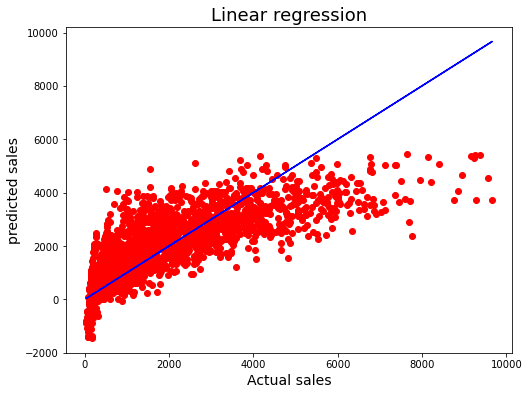

In [36]:
import matplotlib.pyplot as plt 
plt. figure(figsize=(8,6)) 
plt. scatter(x=y_test, y=pred_test, color='r') 
plt.plot(y_test, y_test, color='b') 
plt.xlabel('Actual sales', fontsize=14) 
plt.ylabel('predicted sales', fontsize=14) 
plt.title('Linear regression', fontsize=18) 
plt.show()

# Regularization

In [37]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import cross_val_score

In [38]:
from sklearn.linear_model import Lasso 
parameters = {'alpha' : [.0001, .001, .01, .1, 1, 10], 'random_state' :list (range(0,10))} 
ls= Lasso() 
clf= GridSearchCV(ls, parameters) 
clf.fit(x_train, y_train)
print (clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [39]:
ls=Lasso(alpha=1, random_state=0) 
ls.fit(x_train, y_train) 
ls.score(x_train, y_train) 
pred_ls=ls.predict(x_test) 
lss = r2_score(y_test ,pred_ls) 
lss

0.5412843747180921

In [40]:
cv_score=cross_val_score (ls , x, y,cv=3) 
cv_mean=cv_score.mean() 
cv_mean

0.5264961910250955

# Ensemble Technique

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor 


parameters = {'criterion':['mse', 'mae'], 'max_features':['auto', 'sqrt','log2']}
rf=RandomForestRegressor() 
clf = GridSearchCV(rf,parameters) 
clf.fit(x_train ,y_train) 
print (clf.best_params_)
              

In [42]:
rf=RandomForestRegressor (criterion="mse", max_features="auto") 
rf.fit(x_train, y_train) 
rf.score(x_train,y_train) 
pred_decision =rf.predict(x_test) 

rfs = r2_score(y_test, pred_decision) 
print('R2 core:' , rfs*100 ) 
     
rfscore = cross_val_score( rf,x,y,cv=3) 
rfc = rfscore.mean() 
print('Cross Val Score:',rfc* 100)

R2 core: 58.60048280472363
Cross Val Score: 55.1724783213358


In [43]:
import pickle 
filename = 'bigdatamart_train_project.pkl'
pickle.dump(rf, open( filename, 'wb' ))

# Conclusion

In [44]:
loaded_model = pickle.load(open('bigdatamart_train_project.pkl', 'rb')) 
result = loaded_model.score(x_test, y_test)

print(result)

0.5860048280472363


In [45]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:], pred_decision[:]], index=["Predicted", "orginal"])

conclusion

,0,1,2,3,4,5,6,7,8,9,...,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704
Predicted,1216.629656,1677.816,5317.704652,2484.219644,1151.214806,4147.854104,4097.606178,1558.850856,284.855872,78.784114,...,4188.095056,2690.23148,4182.282622,756.422038,1670.678624,1339.55631,558.526304,1249.87305,3071.981226,1579.803582
orginal,1216.629656,1677.816,5317.704652,2484.219644,1151.214806,4147.854104,4097.606178,1558.850856,284.855872,78.784114,...,4188.095056,2690.23148,4182.282622,756.422038,1670.678624,1339.55631,558.526304,1249.87305,3071.981226,1579.803582


# Working on Test Data

In [46]:
df.test=pd.read_csv('bigdatamart_Test.csv')
df.test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [49]:
df.test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [50]:
df.test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

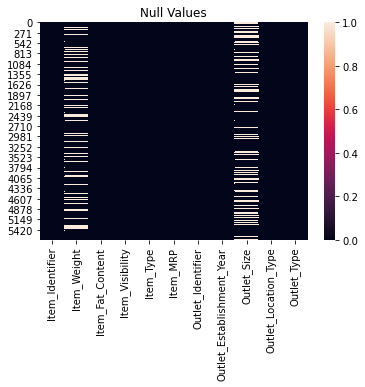

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.test.isnull())
plt.title('Null Values')
plt.show()

In [53]:
df.test['Item_Weight']=df.test['Item_Weight'].fillna(np.mean(df.test['Item_Weight']))
df.test['Outlet_Size']=df.test['Outlet_Size'].fillna(' ')

In [54]:
df.test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

no null values left.

# Data Visualisation

8523


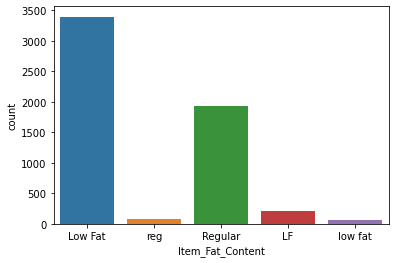

In [55]:
ax=sns.countplot(x='Item_Fat_Content',data=df.test)
print(df['Item_Fat_Content'].count())

8523


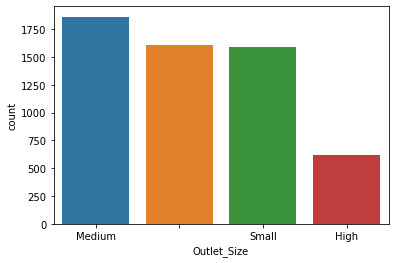

In [56]:
ax=sns.countplot(x='Outlet_Size',data=df.test)
print(df['Outlet_Size'].count())

8523


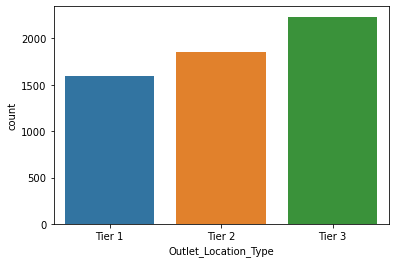

In [57]:
ax=sns.countplot(x='Outlet_Location_Type',data=df.test)
print(df['Outlet_Location_Type'].count())

5681


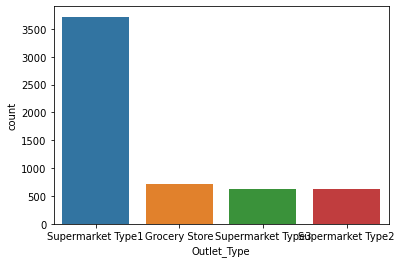

In [61]:
ax=sns.countplot(x='Outlet_Type',data=df.test)
print(df.test['Outlet_Type'].count())

5681


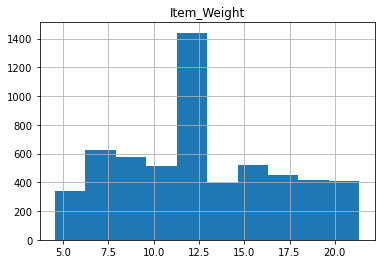

In [59]:
df.test['Item_Weight'].hist(grid=True)
plt.title('Item_Weight')
print(df.test['Item_Weight'].count())
plt.show()

5681


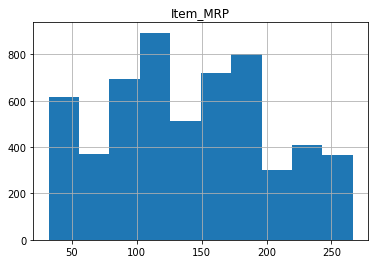

In [60]:
df.test['Item_MRP'].hist(grid=True)
plt.title('Item_MRP')
print(df.test['Item_MRP'].count())
plt.show()

# Encoding The Data

In [70]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in df.test.columns:
    if df.test[i].dtypes=="object":
        df.test[i]=enc.fit_transform(df.test[i].values.reshape(-1,1))

In [71]:
df.test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,20.750000,1.0,0.007565,13.0,107.8622,9.0,1999,2.0,0.0,1.0
1,1067.0,8.300000,4.0,0.038428,4.0,87.3198,2.0,2007,0.0,1.0,1.0
2,1406.0,14.600000,1.0,0.099575,11.0,241.7538,0.0,1998,0.0,2.0,0.0
3,809.0,7.315000,1.0,0.015388,13.0,155.0340,2.0,2007,0.0,1.0,1.0
4,1184.0,12.695633,2.0,0.118599,4.0,234.2300,5.0,1985,2.0,2.0,3.0


# Checking for outliers

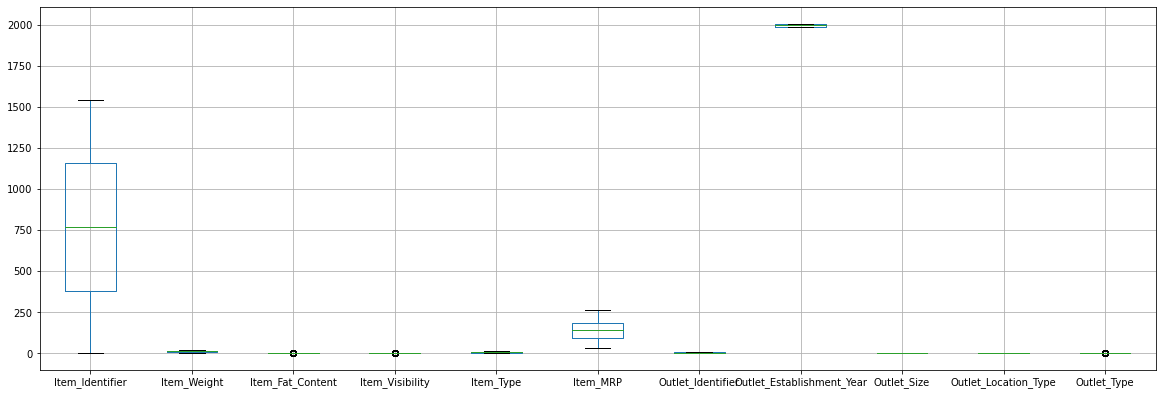

In [72]:
df.test.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=.25)
plt.show()

Rearly any outliers colud be seen. 

# Loading Train Model

In [67]:
fitted_model=pickle.load(open('bigdatamart_train_project.pkl','rb'))

In [68]:
fitted_model

RandomForestRegressor()

In [73]:
predictions=fitted_model.predict(df.test)

In [75]:
predictions

array([4479.20279 , 4407.076676, 4310.45578 , ..., 4445.28028 ,
       4386.017422, 4421.364744])